## Observations and Insights 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_mouse_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
# Display the data table for preview
merge_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
num_mouse = len(merge_mouse_df["Mouse ID"].unique())
mouse_count = pd.DataFrame({"Total Mice: ":[num_mouse]})
mouse_count

,Total Mice:
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_mouse_df["Mouse ID"].value_counts()

g989    13
u196    10
m269    10
b128    10
o795    10
        ..
u153     1
f932     1
o848     1
x226     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_mouse_df.drop_duplicates(["Mouse ID", "Timepoint"], keep= "last")
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mouse = len(clean_mouse_df["Mouse ID"].unique())
mouse_count = pd.DataFrame({"Total Mice: ":[num_mouse]})
mouse_count

,Total Mice:
0,249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = clean_mouse_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
stdev = clean_mouse_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = clean_mouse_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

stat_table = pd.DataFrame(mean)
stat_table2 = stat_table.rename(columns={"Tumor Volume (mm3)": "Mean"})

stat_table2["Median"] = median
stat_table2["Variance"] = variance
stat_table2["stdev"] = stdev
stat_table2["SEM"] = sem

stat_table2


,Mean,Median,Variance,stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

GroupBy = clean_mouse_df.groupby("Drug Regimen")

stat_table3 = GroupBy.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

stat_table3


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

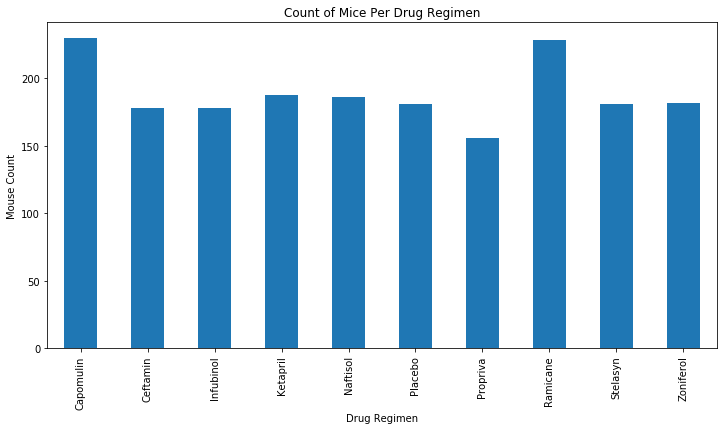

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
datapoints = clean_mouse_df.groupby("Drug Regimen").count()["Mouse ID"]
datapoints

datapoints.plot(kind = "bar", figsize=(12,6))

plt.title("Count of Mice Per Drug Regimen")
plt.ylabel("Mouse Count")

plt.show()
plt.tight_layout()


Text(0.5, 0, 'Drug Regimen')

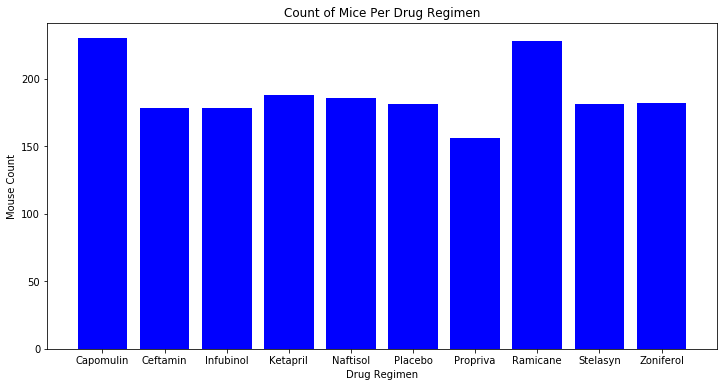

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_count = datapoints.tolist()

drug_names = stat_table3.index.tolist()

plt.figure(figsize = (12,6))
plt.bar(drug_names, regimen_count, color = "b") 

plt.title("Count of Mice Per Drug Regimen")
plt.ylabel("Mouse Count")
plt.xlabel("Drug Regimen")



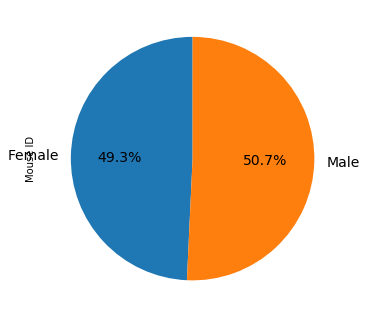

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_mouse_df.groupby(["Sex"]).count())["Mouse ID"]
gender_df

plt.figure(figsize = (12,6))
axis = plt.subplot(121, aspect="equal")
gender_df.plot(kind = "pie", y = "Count", autopct = '%1.1f%%', startangle=90, legend = False, fontsize = 14)


([<matplotlib.patches.Wedge at 0x2abc7e3a348>,
 [Text(-1.1996743997805108, 0.027952361461444673, 'Females'),
  Text(1.099701530733132, -0.025623100967813024, 'Males')],
 [Text(-0.6998100665386312, 0.016305544185842725, '49.3%'),
  Text(0.5998371985817083, -0.013976236891534375, '50.7%')])

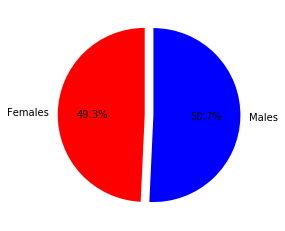

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df

labels = ["Females", "Males"]
colors = ["red", "blue"]

explode = (.1 , 0)
plt.pie(gender_df, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', startangle=90)

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
top_drugs = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_drugs = top_drugs.sort_values(["Timepoint"], ascending = False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_drug_data = top_drugs[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]


In [51]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

    

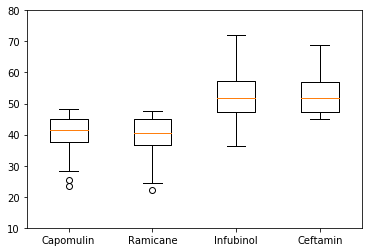

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = top_drug_data.reset_index()
tumors = box_plot.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumors_df = pd.DataFrame(tumors)
tumors_df = tumors_df.reindex(drug_list)
tumor_vols = [vol for vol in tumors_df["Tumor Volume (mm3)"]]
plt.boxplot(tumor_vols, labels=drug_list)
plt.ylim(10,80)
plt.show()

## Line and Scatter Plots

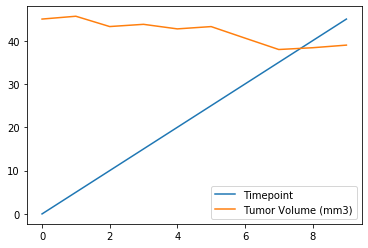

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_tumor = clean_mouse_df[clean_mouse_df["Mouse ID"].isin(["b128"])]

time_tumor_data = time_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot_df = time_tumor_data.reset_index()

line_plot= line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

lines = line_plot.plot.line()


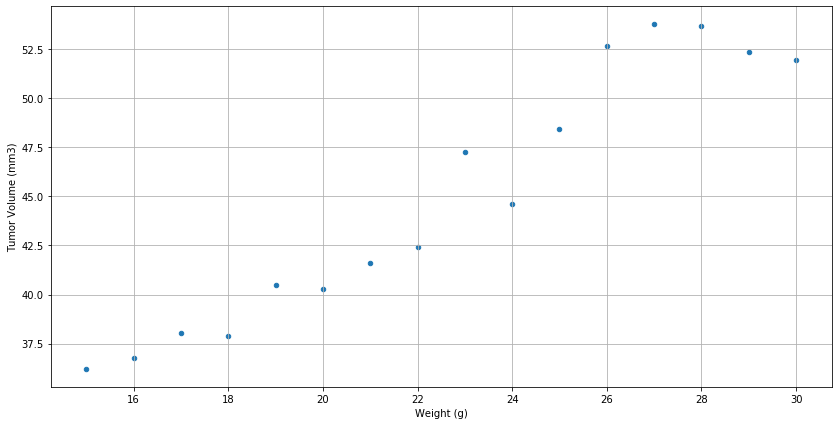

In [72]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin"])]

cap_df = top_drugs[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

cap_df_plot = cap_df.reset_index()

cap_sorted = cap_df_plot.sort_values(["Weight (g)"], ascending=True)

cap_grouped_weight = cap_df_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

cap_grouped_plot = pd.DataFrame(cap_grouped_weight).reset_index()

cap_scatter = cap_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (14,7))

## Correlation and Regression

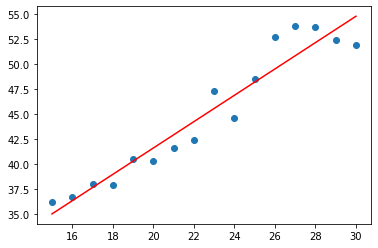

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_grouped_plot["Weight (g)"]
y_values = cap_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()
